# Data Analysis of DataSet World Population

**date:** January 2023 <br>
**created by:** Frederick Salazar <br>
**description:** This Data Analytics project is based in dataset provided by World Banck about the world population for all countries by year, the general idea is discover insights using python data analysis.i want learn about the population world, Latin America and Colombia popupaltion

In [104]:
#import requeried libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Import and Explore Data

In [105]:
#load data of world population
df_population = pd.read_csv('./data/data_population_world.csv', sep=',')

#load data of metadata about countries
df_metadata = pd.read_csv('./data/metadata_countries.csv', sep=',')

#load country codes
df_codes = pd.read_csv('./data/country_codes_list.csv', sep=',')

In [106]:
#show a first 15 rows
df_population.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,Unnamed: 66
0,Aruba,ABW,"Población, total",SP.POP.TOTL,54608.0,55811.0,56682.0,57475.0,58178.0,58782.0,...,102880.0,103594.0,104257.0,104874.0,105439.0,105962.0,106442.0,106585.0,106537.0,NaN
1,NaN,AFE,"Población, total",SP.POP.TOTL,130692579.0,134169237.0,137835590.0,141630546.0,145605995.0,149742351.0,...,567891875.0,583650827.0,600008150.0,616377331.0,632746296.0,649756874.0,667242712.0,685112705.0,702976832.0,NaN
2,Afganistán,AFG,"Población, total",SP.POP.TOTL,8622466.0,8790140.0,8969047.0,9157465.0,9355514.0,9565147.0,...,31541209.0,32716210.0,33753499.0,34636207.0,35643418.0,36686784.0,37769499.0,38972230.0,40099462.0,NaN
3,NaN,AFW,"Población, total",SP.POP.TOTL,97256290.0,99314028.0,101445032.0,103667517.0,105959979.0,108336203.0,...,387204553.0,397855507.0,408690375.0,419778384.0,431138704.0,442646825.0,454306063.0,466189102.0,478185907.0,NaN
4,Angola,AGO,"Población, total",SP.POP.TOTL,5357195.0,5441333.0,5521400.0,5599827.0,5673199.0,5736582.0,...,26147002.0,27128337.0,28127721.0,29154746.0,30208628.0,31273533.0,32353588.0,33428486.0,34503774.0,NaN


In [107]:
#show of total null values by column
df_population.isna().sum()

Country Name        2
Country Code        0
Indicator Name      0
Indicator Code      0
1960                2
                 ... 
2018                1
2019                1
2020                1
2021                1
Unnamed: 66       266
Length: 67, dtype: int64

In [108]:
#Show the estructure fields of dataframe
df_population.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 67 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    264 non-null    object 
 1   Country Code    266 non-null    object 
 2   Indicator Name  266 non-null    object 
 3   Indicator Code  266 non-null    object 
 4   1960            264 non-null    float64
 5   1961            264 non-null    float64
 6   1962            264 non-null    float64
 7   1963            264 non-null    float64
 8   1964            264 non-null    float64
 9   1965            264 non-null    float64
 10  1966            264 non-null    float64
 11  1967            264 non-null    float64
 12  1968            264 non-null    float64
 13  1969            264 non-null    float64
 14  1970            264 non-null    float64
 15  1971            264 non-null    float64
 16  1972            264 non-null    float64
 17  1973            264 non-null    flo

## Transform Data

In [109]:
# change format table to wide format into a large format

df_population = pd.melt(df_population,
                        id_vars=['Country Name',
                                 'Country Code',
                                 'Indicator Name',
                                 'Indicator Code'],
                        value_vars=df_population.iloc[:, 4:-1].columns,
                        var_name='year',
                        value_name=('total'))

In [110]:
#set column names
df_population.columns = ['country_name', 'country_code', 'indicator_name', 'indicator_code', 'year', 'population']

In [111]:
#show the first ten rows
df_population.head(10)

,country_name,country_code,indicator_name,indicator_code,year,population
0,Aruba,ABW,"Población, total",SP.POP.TOTL,1960,54608.0
1,NaN,AFE,"Población, total",SP.POP.TOTL,1960,130692579.0
2,Afganistán,AFG,"Población, total",SP.POP.TOTL,1960,8622466.0
3,NaN,AFW,"Población, total",SP.POP.TOTL,1960,97256290.0
4,Angola,AGO,"Población, total",SP.POP.TOTL,1960,5357195.0
5,Albania,ALB,"Población, total",SP.POP.TOTL,1960,1608800.0
6,Andorra,AND,"Población, total",SP.POP.TOTL,1960,9443.0
7,El mundo árabe,ARB,"Población, total",SP.POP.TOTL,1960,93359407.0
8,Emiratos Árabes Unidos,ARE,"Población, total",SP.POP.TOTL,1960,133426.0
9,Argentina,ARG,"Población, total",SP.POP.TOTL,1960,20349744.0


In [112]:
#Show the new structure of dataframe
df_population.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16492 entries, 0 to 16491
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   country_name    16368 non-null  object 
 1   country_code    16492 non-null  object 
 2   indicator_name  16492 non-null  object 
 3   indicator_code  16492 non-null  object 
 4   year            16492 non-null  object 
 5   population      16400 non-null  float64
dtypes: float64(1), object(5)
memory usage: 773.2+ KB


### Drop Na values

In [113]:
#show the null values by column
df_population.isna().sum()

country_name      124
country_code        0
indicator_name      0
indicator_code      0
year                0
population         92
dtype: int64

In [114]:
#delete nan row in column population

df_population = df_population.dropna(subset=['population'])

In [115]:
#show the null values by column
df_population.isna().sum()

country_name      124
country_code        0
indicator_name      0
indicator_code      0
year                0
population          0
dtype: int64

### Select useful Columns

In [116]:
#select columns

df_population = df_population[['country_code',
                               'country_name',
                               'year',
                               'population']]

### Union Metadata with population

In [117]:
#set metada name columns
df_metadata.columns = ['country_name', 'country_code', 'region','income_group', 'n']

#Set de nan values to Sin region value
df_metadata['region'] = df_metadata['region'].fillna('Sin region')

In [118]:
#merge population dataframe with metadata dataframe to get aditional info
df_world_population = df_population.merge(df_metadata,
                                          left_on='country_code',
                                          right_on='country_code',
                                          how='inner')

#select the fields more fields (income_group, region)
df_world_population = df_world_population[['country_code',
                                           'country_name_x',
                                           'region',
                                           'income_group',
                                           'year',
                                           'population']]

### Add new columns

In [119]:
#Sort data by country and year values ascending mode
df_world_population = df_world_population.sort_values(['country_code', 'year'], ascending=True)

#create a column diff to calculate % variation by country and year in your population rate
df_world_population['%_diff'] = df_world_population.groupby(['country_name_x'], 
                                                            group_keys=False)['population'].pct_change()*100

df_world_population['population_million'] = df_world_population['population']/1000000
df_world_population['population_million'] = df_world_population['population_million'].round(1)

### Divide subsets by Countries Data and Resume world organizations data

In [120]:
#get only countries data
df_countries_pop = df_world_population.merge(df_codes,
                                             left_on='country_code',
                                             right_on='alpha-3',
                                             how='inner')

df_organizations_pop = df_world_population[~df_world_population['country_code'].isin(df_countries_pop['country_code'])]

In [121]:
#select most important fields
df_countries_pop = df_countries_pop[['country_code',
                                     'country_name_x',
                                     'region_y',
                                     'sub-region',
                                     'income_group',
                                     'year',
                                     'population',
                                     'population_million',
                                     '%_diff']]

#Set name of column final dataframe
df_countries_pop.columns = ['country_code',
                            'country_name',
                            'region_name',
                            'sub_region_name',
                            'income_group',
                            'year',
                            'population',
                            'population_million',
                            '%_diff']

df_organizations_pop.columns = ['country_code',
                                'country_name',
                                'region_name',
                                'sub_region_name',
                                'year',
                                'population',
                                '%_diff',
                                'population_million']

# Explore Data 

## World population

In [148]:
df_mundo = df_organizations_pop[df_organizations_pop['country_name'] == 'Mundo']

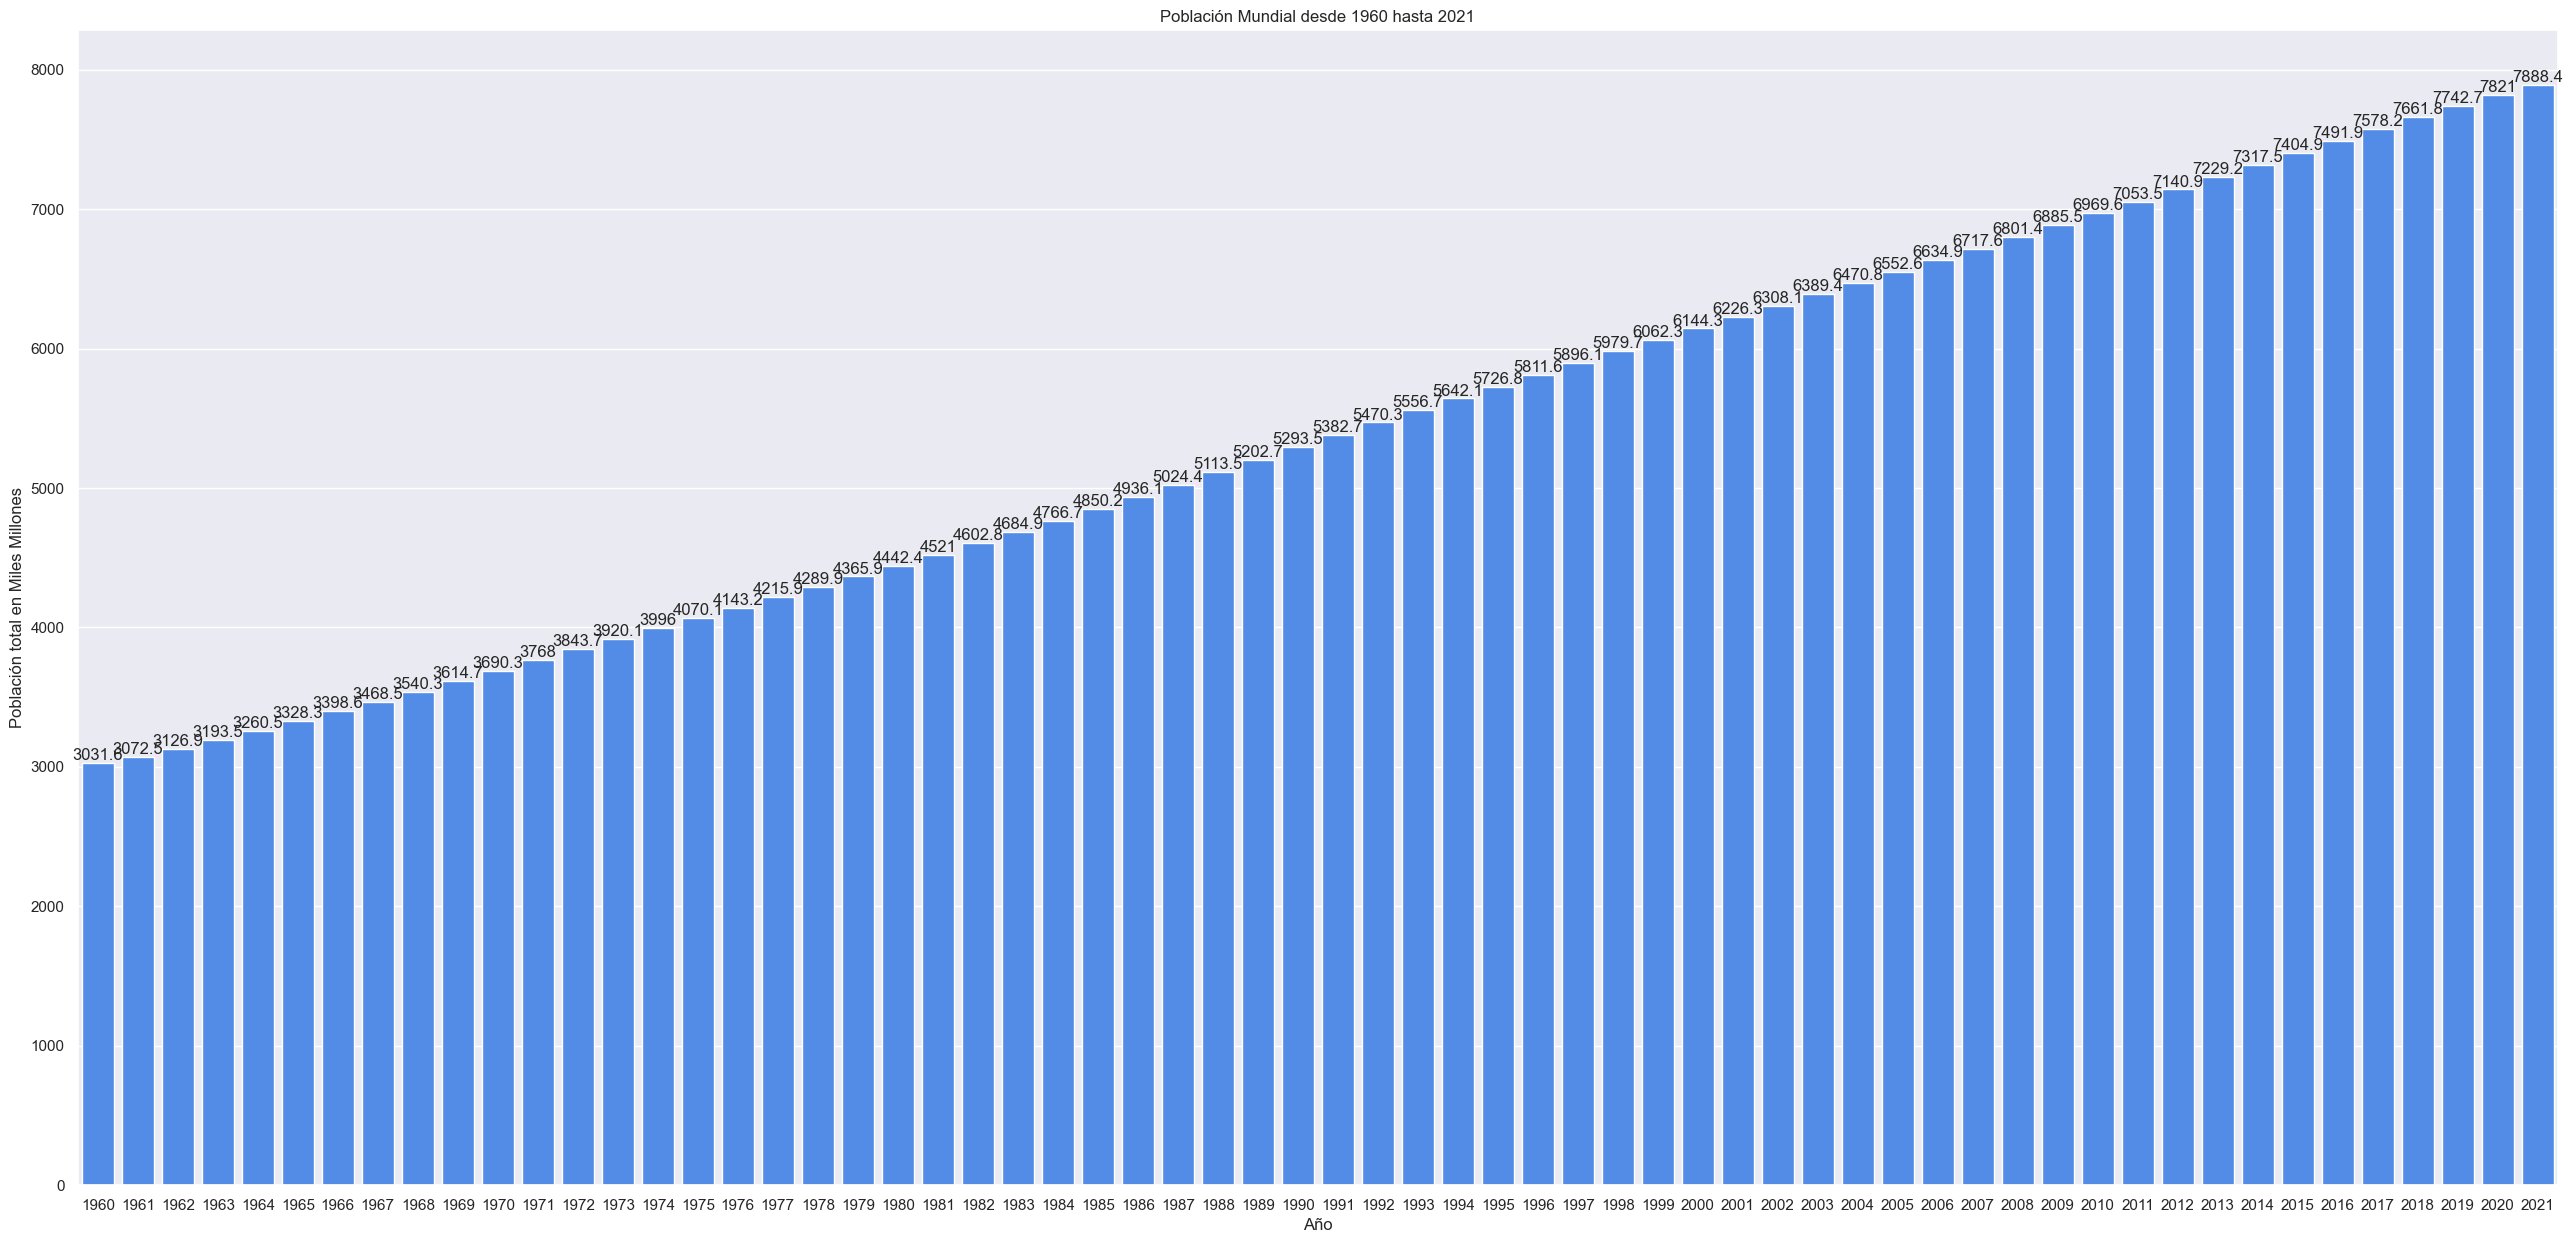

In [150]:
plt.figure(figsize=(32,15))
plt.title('Población Mundial desde 1960 hasta 2021')

sns.set_theme(style='darkgrid',
              palette='pastel')

ax = sns.barplot(data=df_mundo,
                 x='year',
                 y='population_million',
                 palette=['#3a86ff'])

for x in ax.containers:
    ax.bar_label(x, )

plt.xlabel('Año')
plt.ylabel('Población total en Miles Millones')
plt.show()

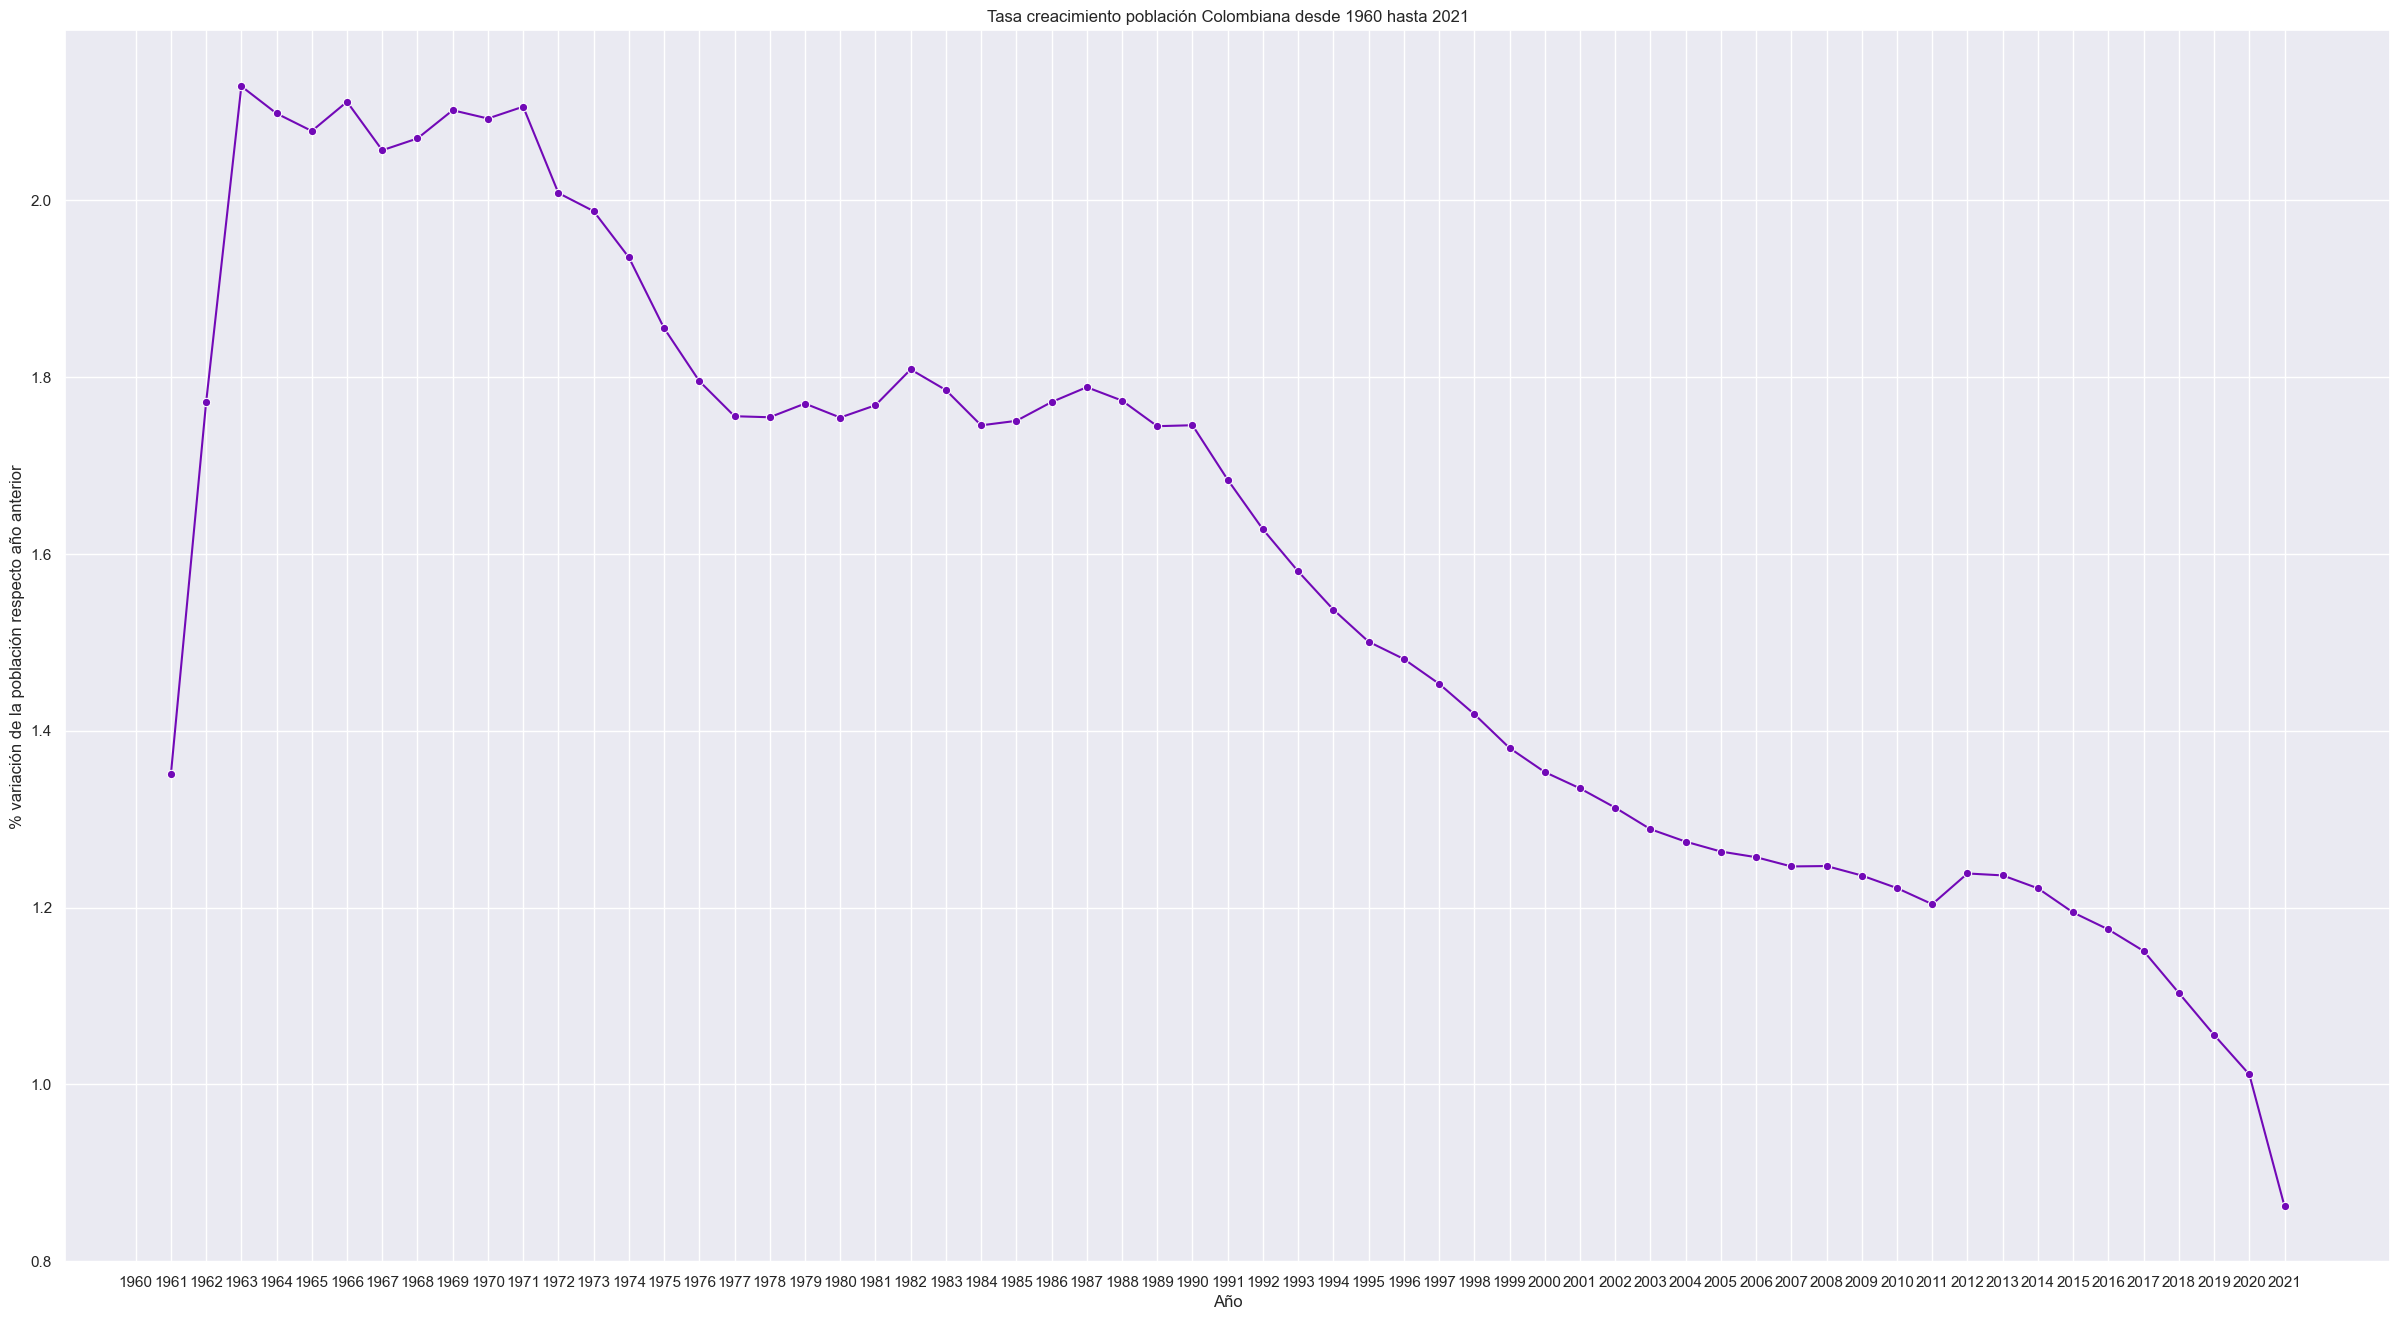

In [138]:
plt.figure(figsize=(30, 16))

ax = sns.lineplot(data=df_mundo,
                 x='year',
                 y='%_diff',
                 marker='o',
                 color = '#7209b7')
    
plt.title('Tasa creacimiento población Mundial desde 1960 hasta 2021' )
plt.xlabel('Año')
plt.ylabel('% variación de la población respecto año anterior')
plt.show()

## Colombian Population

In [145]:
df_colombia= df_countries_pop[df_countries_pop['country_name'] == 'Colombia']

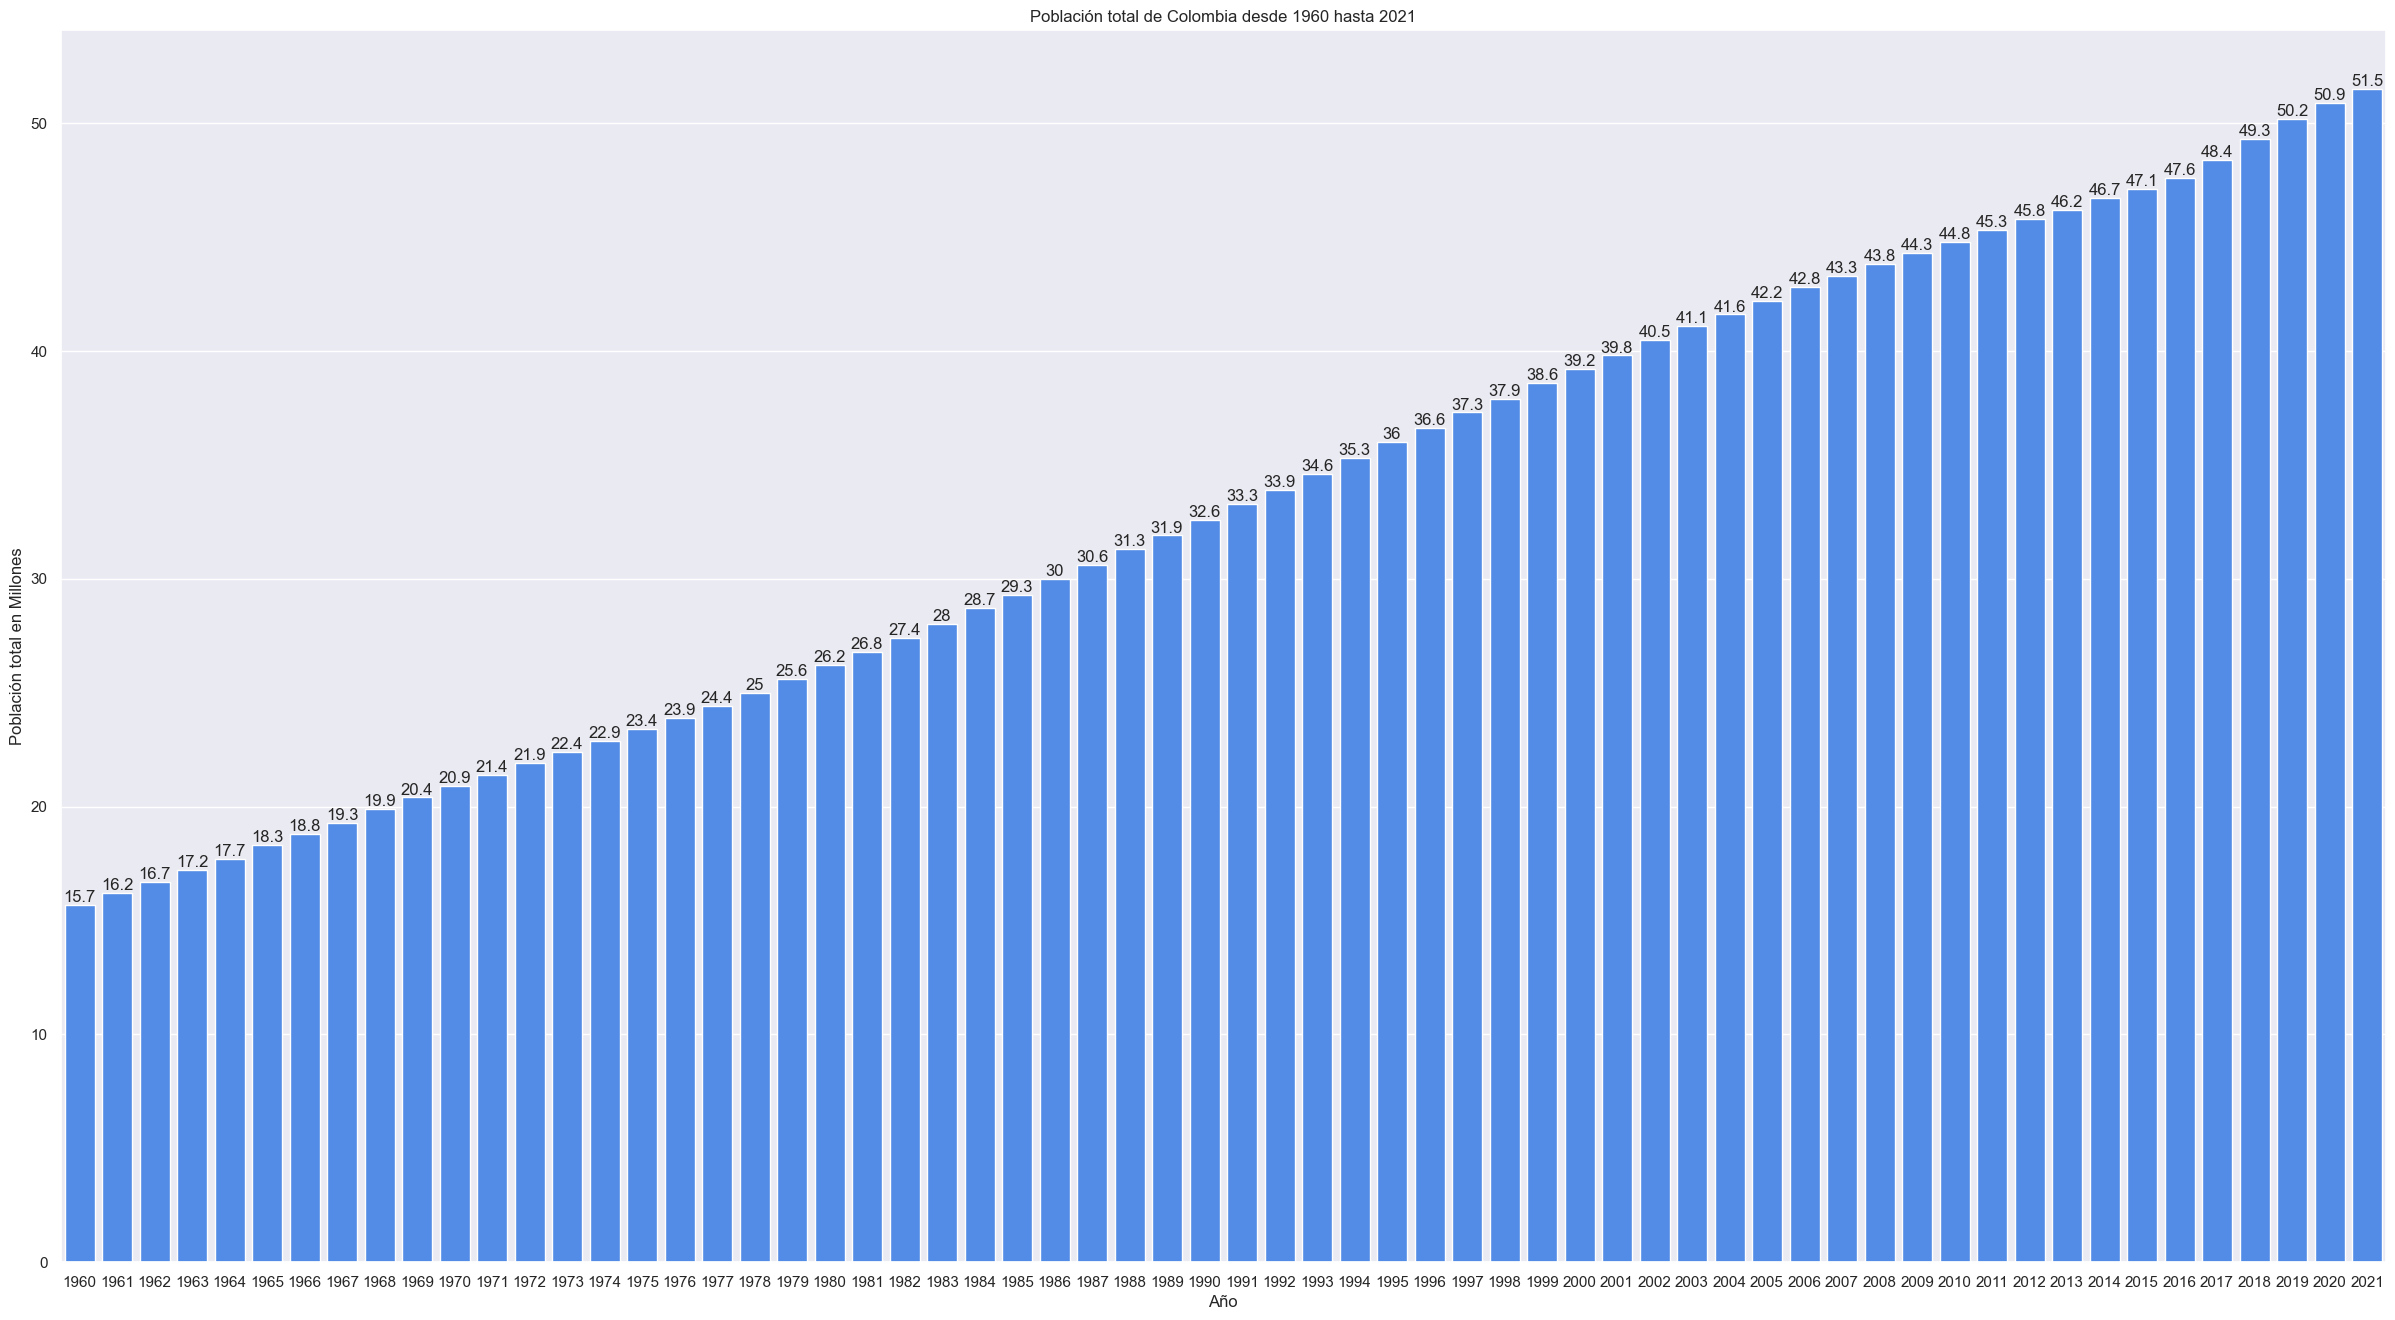

In [146]:
plt.figure(figsize=(30,16))
plt.title('Población total de Colombia desde 1960 hasta 2021')

sns.set_theme(style='darkgrid',
              palette='pastel')

ax = sns.barplot(data=df_colombia,
                 x='year',
                 y='population_million',
                 palette=['#3a86ff'])

for x in ax.containers:
    ax.bar_label(x, )

plt.xlabel('Año')
plt.ylabel('Población total en Millones')
plt.show()

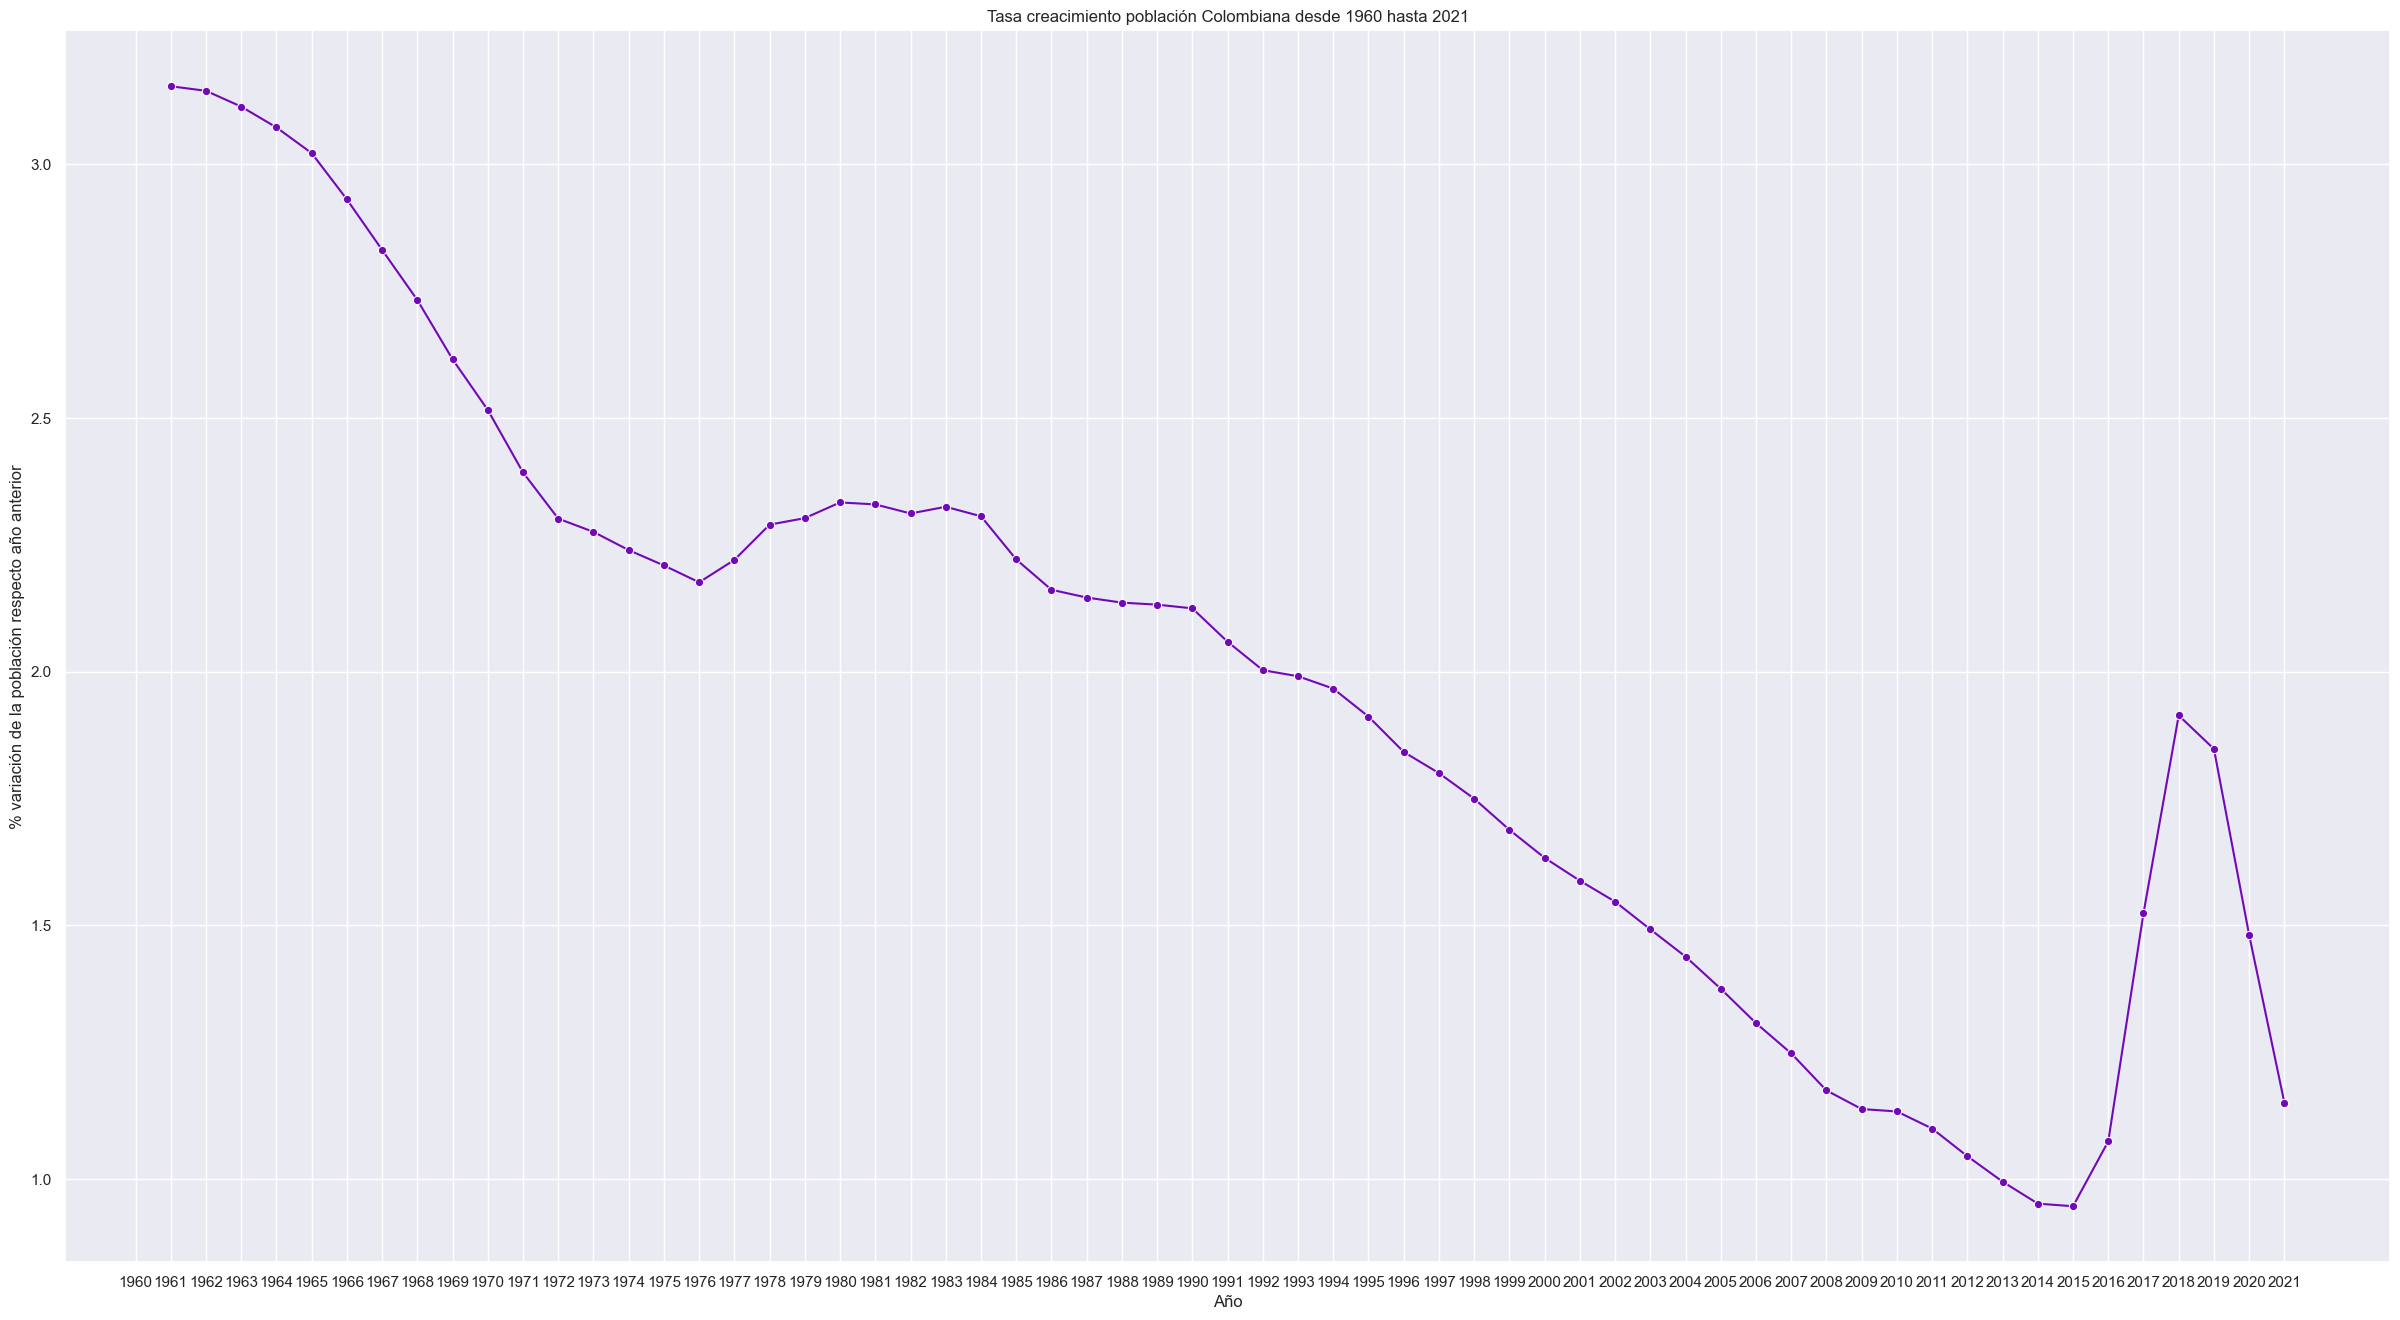

In [147]:
plt.figure(figsize=(30, 16))

ax = sns.lineplot(data=df_colombia,
                 x='year',
                 y='%_diff',
                 marker='o',
                 color = '#7209b7')
    
plt.title('Tasa creacimiento población Colombiana desde 1960 hasta 2021' )
plt.xlabel('Año')
plt.ylabel('% variación de la población respecto año anterior')
plt.show()

## Countries that grew the most in 2021

In [151]:
df_countries_pop.head()

,country_code,country_name,region_name,sub_region_name,income_group,year,population,population_million,%_diff
0,ABW,Aruba,Americas,Latin America and the Caribbean,Ingreso alto,1960,54608.0,0.1,NaN
1,ABW,Aruba,Americas,Latin America and the Caribbean,Ingreso alto,1961,55811.0,0.1,2.202974
2,ABW,Aruba,Americas,Latin America and the Caribbean,Ingreso alto,1962,56682.0,0.1,1.560624
3,ABW,Aruba,Americas,Latin America and the Caribbean,Ingreso alto,1963,57475.0,0.1,1.399033
4,ABW,Aruba,Americas,Latin America and the Caribbean,Ingreso alto,1964,58178.0,0.1,1.223140


In [152]:
df_2021 = df_countries_pop[df_countries_pop['year'] == '2021']

In [153]:
df_2021

,country_code,country_name,region_name,sub_region_name,income_group,year,population,population_million,%_diff
61,ABW,Aruba,Americas,Latin America and the Caribbean,Ingreso alto,2021,106537.0,0.1,-0.045034
123,AFG,Afganistán,Asia,Southern Asia,Países de ingreso bajo,2021,40099462.0,40.1,2.892398
185,AGO,Angola,Africa,Sub-Saharan Africa,Países de ingreso mediano bajo,2021,34503774.0,34.5,3.216682
247,ALB,Albania,Europe,Southern Europe,Ingreso mediano alto,2021,2811666.0,2.8,-0.922635
309,AND,Andorra,Europe,Southern Europe,Ingreso alto,2021,79034.0,0.1,1.716860
...,...,...,...,...,...,...,...,...,...
13051,WSM,Samoa,Oceania,Polynesia,Países de ingreso mediano bajo,2021,218764.0,0.2,1.784310
13113,YEM,"Yemen, Rep. del",Asia,Western Asia,Países de ingreso bajo,2021,32981641.0,33.0,2.160804
13175,ZAF,Sudáfrica,Africa,Sub-Saharan Africa,Ingreso mediano alto,2021,59392255.0,59.4,1.003926
13237,ZMB,Zambia,Africa,Sub-Saharan Africa,Países de ingreso bajo,2021,19473125.0,19.5,2.881542
